In [1]:
# Use latest pip to avoid dependency issues
!python -m pip install -U pip
!(python -m pip install --no-cache-dir \
    pandas \
    matplotlib \
    torch==1.8.2 \
    torchvision==0.9.2 \
    --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/lts/1.8/cu111
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 136.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip


1.1 Download PathMNIST Dataset

In [2]:
# Install medmnist package
!python -m pip install -q medmnist
!python -c "import medmnist; print('MEDMNIST: ', medmnist.__version__)"

# Download medmnist datasets
!python -m medmnist download

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
MEDMNIST:  2.1.0
205616128it [00:09, 21664869.79it/s]                   
82802688it [00:04, 18362303.23it/s]                  
19725312it [00:01, 13106832.13it/s]                  
54938624it [00:03, 16662316.53it/s]                  
4170752it [00:00, 4788779.46it/s]                 
3291136it [00:00, 4209278.23it/s]                 
560128it [00:00, 1276210.80it/s]                
35462144it [00:02, 16863122.37it/s]                  
124962816it [00:05, 22807932.61it/s]                   
38248448it [00:02, 16126704.54it/s]                  
15527936it [00:01, 11757037.30it/s]                  
16529408it [00:01, 11601694.92it/s]                  
32657408it [00:02, 15778227.11it/s]                  
29299712it [00:02, 14199345.52it/s]                  
277504it [00:00, 643151.03it/s]                
3278848it [00:00, 3726127.70it/s]                 
399360it [00:0

1.2 convert to images 

In [4]:
# Convert dataset from numpy to *.png
!(python -m medmnist save \
  --flag=pathmnist \
  --folder=./medmnist/dataset/ \
  --postfix=png)

Saving pathmnist train...
100% 89996/89996 [00:34<00:00, 2616.93it/s]
Saving pathmnist val...
100% 10004/10004 [00:03<00:00, 2740.26it/s]
Saving pathmnist test...
100% 7180/7180 [00:02<00:00, 2456.62it/s]


In [6]:
%%bash
# Train CSV list
wget -q --show-progress -O ./medmnist/dataset/train_path_full.csv "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=um4003lkrvyj55jm4a0jz7zsuokb0r8o&file_id=f_991821586980"
echo "Downloaded train list"

# Validation CSV list
wget -q --show-progress -O ./medmnist/dataset/val_path_full.csv "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=rsmff27sm2z34r5xso1jx8xix7nhfspc&file_id=f_991817441206"
echo "Downloaded val list"

# Test CSV list
wget -q --show-progress -O ./medmnist/dataset/test_path_tiny.csv "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=22lm0qfzk5luap72mtdpzx5l3ocflopa&file_id=f_991819617152"
echo "Downloaded test list"

Downloaded train list
Downloaded val list
Downloaded test list



     0K .......... .......... .......... .......... .......... 20% 1.20M 0s
    50K .......... .......... .......... .......... .......... 40%  652K 0s
   100K .......... .......... .......... .......... .......... 60% 1.57M 0s
   150K .......... .......... .......... .......... .......... 80% 1.64M 0s
   200K .......... .......... .......... .......... .......   100% 1.95M=0.2s
     0K .......... .......... .......... .......... .......... 88% 5.94M 0s
    50K ......                                                100% 5.89M=0.009s
     0K .......... .......... .........                       100%  683K=0.04s

In [7]:
import os
import shutil
import numpy as np
import pandas as pd

# Convert ALL paths in the CSV to Absolute paths
csv_files = {
    'train': './medmnist/dataset/train_path_full.csv',
    'val': './medmnist/dataset/val_path_full.csv',
    'test': './medmnist/dataset/test_path_tiny.csv'
}

for path in csv_files.values():
    with open(path, 'r') as f:
        content = f.read()
        content = content.replace('./medmnist', os.path.abspath('./medmnist'))
    
    with open(path, 'w') as f:
        f.write(content)
    print('Updated paths in ', path)

Updated paths in  ./medmnist/dataset/train_path_full.csv
Updated paths in  ./medmnist/dataset/val_path_full.csv
Updated paths in  ./medmnist/dataset/test_path_tiny.csv


visualize the data 

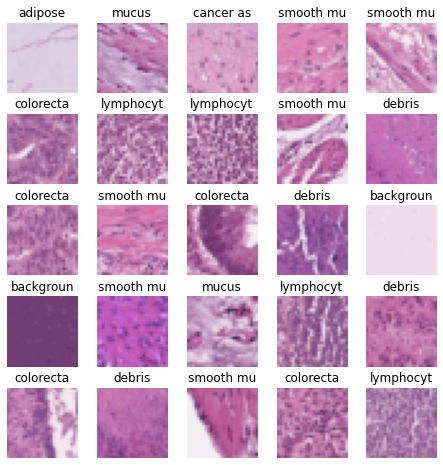

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

n_img = 5
train_samples = pd.read_csv(csv_files['train']).head(n_img*n_img)

label2str = [
    'adipose',
    'background',
    'debris',
    'lymphocytes',
    'mucus',
    'smooth muscle',
    'normal colon mucosa',
    'cancer associated stroma',
    'colorectal adenocarcinoma epithelium'
]

fig, ax = plt.subplots(n_img, n_img, figsize=(8, 8))

for k in range(len(train_samples)):
    i = k // n_img
    j = k % n_img
    filepath = train_samples.iloc[k]['Channel_0']
    label = train_samples.iloc[k]['valuetopredict']
    ax[i, j].imshow(Image.open(filepath))
    ax[i, j].title.set_text(label2str[label][:9])
    ax[i, j].axis('off')
fig.subplots_adjust(wspace=0.03, hspace=0.3)

Federated Learning

In [9]:
%%bash
# Install OpenFL
rm -rf openfl
git clone -b miccai_fl_tutorial https://github.com/intel/openfl.git
cd openfl
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/openfl
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

Cloning into 'openfl'...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.8.2+cu111 which is incompatible.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.34.1 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.19.4 which is incompatible.
google-colab 1.0.0 requires notebook~=5.7.16, but you have notebook 6.5.2 which is incompatible.
google-colab 1.0.0 requires tornado~=6.0.4, but you have tornado 6.2 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.19.4 which is incompatible.
google-cloud-language 2.6.1 requires protobuf!

In [10]:
%%bash
# Download and install GaNDLF modules
rm -rf GaNDLF
git clone -b 0.0.14 --depth 1 https://github.com/CBICA/GaNDLF.git
cd GaNDLF
git submodule update --init --recursive
echo "Installing GANDLF"
python -m pip install .
python ./gandlf_verifyInstall

Submodule path 'GANDLF/OPM': checked out 'f46ce145128415b0baf893b4782294c90953f251'
Submodule path 'GANDLF/anonymize/dicomanonymizer': checked out '5193ca5409f397e637e4c1a6dfd8f86a09a3cfc4'
Installing GANDLF
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/GaNDLF
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.1 MB/s eta 0

Cloning into 'GaNDLF'...
Note: switching to 'bdf7c72c90a0ed0355c2c66ce940db3dac828997'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Submodule 'GANDLF/OPM' (https://github.com/CBICA/OPM.git) registered for path 'GANDLF/OPM'
Submodule 'GANDLF/anonymize/dicomanonymizer' (https://github.com/KitwareMedical/dicom-anonymizer.git) registered for path 'GANDLF/anonymize/dicomanonymizer'
Cloning into '/content/GaNDLF/GANDLF/OPM'...
Cloning into '/content/GaNDLF/GANDLF/anonymize/dicomanonymizer'...
ERROR: pip's dependency resolver do

In [11]:
# Verify installations
import sys
gandlf_src = os.path.abspath('./GaNDLF')
sys.path.insert(0, gandlf_src)                # For current kernel python runtime
if 'PYTHONPATH' not in os.environ:
    os.environ['PYTHONPATH'] = ''
os.environ['PYTHONPATH'] += f':{gandlf_src}'  # For shell-invoked python runtime

import GANDLF
print('GaNDLF', GANDLF.__version__)

import openfl
print('OpenFL', openfl.__version__)

GaNDLF 0.0.14
OpenFL 1.4


Create a Federated Learning Workspace

In [12]:
import os
import shutil

# Choose what you like
FL_WORKSPACE_NAME = 'gandlf_example_workspace'
ROUNDS_TO_TRAIN = 2
BATCH_SIZE = 16
DEVICE = 'cpu'

# Create a blank directory with CSV files copied over
workspace_dir = os.path.abspath(os.path.join(os.getcwd(), FL_WORKSPACE_NAME))
if os.path.exists(workspace_dir):
    shutil.rmtree(workspace_dir)
os.mkdir(workspace_dir)

for file in csv_files.values():
    shutil.copy2(file, workspace_dir)
    print(f'Copied `{file}` to workspace `{workspace_dir}`')

Copied `./medmnist/dataset/train_path_full.csv` to workspace `/content/gandlf_example_workspace`
Copied `./medmnist/dataset/val_path_full.csv` to workspace `/content/gandlf_example_workspace`
Copied `./medmnist/dataset/test_path_tiny.csv` to workspace `/content/gandlf_example_workspace`


In [13]:
# Create FL workspace from template
!fx workspace create --prefix $FL_WORKSPACE_NAME --template "gandalf_classification_test" 2>&1

Creating Workspace Directories
Creating Workspace Templates
INFO:openfl.federated.plan.plan:Loading DEFAULTS for section [red]aggregator[/] from file [red]/usr/local/lib/python3.8/dist-packages/openfl-workspace/workspace/plan/defaults/aggregator.yaml[/].
INFO:openfl.federated.plan.plan:Loading DEFAULTS for section [red]assigner[/] from file [red]/usr/local/lib/python3.8/dist-packages/openfl-workspace/workspace/plan/defaults/assigner.yaml[/].
INFO:openfl.federated.plan.plan:Loading DEFAULTS for section [red]collaborator[/] from file [red]/usr/local/lib/python3.8/dist-packages/openfl-workspace/workspace/plan/defaults/collaborator.yaml[/].
INFO:openfl.federated.plan.plan:Loading DEFAULTS for section [red]compression_pipeline[/] from file [red]/usr/local/lib/python3.8/dist-packages/openfl-workspace/workspace/plan/defaults/compression_pipeline.yaml[/].
INFO:openfl.federated.plan.plan:Loading DEFAULTS for section [red]data_loader[/] from file [red]/usr/local/lib/python3.8/dist-packages/openf

In [14]:
# Certify and Export the workspace
import socket
FQDN = 'localhost'
print(FQDN)
!(cd $workspace_dir &&\
  sed -i "/rounds_to_train/c\    rounds_to_train: $ROUNDS_TO_TRAIN" plan/plan.yaml &&\
  sed -i "/batch_size/c\      batch_size: $BATCH_SIZE" plan/plan.yaml &&\
  sed -i "/device/c\    device: $DEVICE" plan/plan.yaml &&\
  fx plan initialize -a $FQDN &&\
  fx workspace certify &&\
  fx workspace export) | tee 2>&1

localhost
INFO:openfl.federated.plan.plan:FL-Plan hash is [blue]a2165cec4cf1798ee8dcbc8ea4fa2b0052e04826c25679236fdb6acff74dd2259932e0a9a87a4e4a9d8aeaad14ab142e[/]
INFO:openfl.federated.plan.plan:Parsing Federated Learning Plan : [green]SUCCESS[/] : [blue]/content/gandlf_example_workspace/plan/plan.yaml[/].
INFO:openfl.federated.plan.plan:aggregator:
  settings:
    best_state_path: save/fets_seg_test_best.pbuf
    db_store_rounds: 2
    init_state_path: save/fets_seg_test_init.pbuf
    last_state_path: save/fets_seg_test_last.pbuf
    rounds_to_train: 2
    write_logs: true
  template: openfl.component.Aggregator
assigner:
  settings:
    task_groups:
    - name: train_and_validate
      percentage: 1.0
      tasks:
      - aggregated_model_validation
      - train
      - locally_tuned_model_validation
  template: openfl.component.RandomGroupedAssigner
collaborator:
  settings:
    db_store_rounds: 1
    delta_updates: false
    opt_treatment: RESET
  template: openfl.component.Colla

Simulating "Silos" of Data

In [15]:
# Partition the dataset amongst as many collaborators
def data_split(data: np.ndarray, n: int):
    """Equally partition data into n parts"""
    return np.array_split(data, n)

In [16]:
collaborators = ['bob', 'charlie']  # Lowercase names are required
full_list_train = pd.read_csv(csv_files['train'])
train_partitions = data_split(full_list_train.values, n=len(collaborators))
full_list_val = pd.read_csv(csv_files['val'])
val_partitions = data_split(full_list_val.values, n=len(collaborators))

for i, col in enumerate(collaborators):
    # If it exists, clean up and create new
    col_path = os.path.abspath(os.path.join(col, FL_WORKSPACE_NAME))
    if os.path.exists(col_path):
        shutil.rmtree(col_path)
    os.makedirs(col_path)

    # Write train partition as a CSV
    col_list = pd.DataFrame(data=train_partitions[i], columns=full_list_train.columns.values)
    col_csv_path = os.path.join(col_path, 'train_path_full.csv')
    col_list.to_csv(col_csv_path, index=False)

    # Write val partition as a CSV
    col_list = pd.DataFrame(data=val_partitions[i], columns=full_list_val.columns.values)
    col_csv_path = os.path.join(col_path, 'val_path_full.csv')
    col_list.to_csv(col_csv_path, index=False)

    # Copy test/val partition as-is
    shutil.copy2(csv_files['test'], col_path)
    print(f'Train/Test/Val CSV for `{col}` written to {col_path}')

Train/Test/Val CSV for `bob` written to /content/bob/gandlf_example_workspace
Train/Test/Val CSV for `charlie` written to /content/charlie/gandlf_example_workspace


Registering Aggregators and Collaborators

In [17]:
%%bash
# Download config file for training/inference settings
wget -q --show-progress -O config.yaml "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=hs0zwezggl4rxtzgrcaq86enu7qwuvqx&file_id=f_974251081617"

# This file will help plotting and visualizing our results
wget -q --show-progress -O gandlf_collectStats_final "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=avq6pvqg3uzsc4uzbklab66mad6eaik5&file_id=f_989875069231"


     0K .........                                             100%  745K=0.01s
     0K .........                                             100% 1.61M=0.006s

In [18]:
# Get the path to archives
archive_path = os.path.join(workspace_dir, f'{FL_WORKSPACE_NAME}.zip')
data_path = './medmnist/dataset/pathmnist'

In [19]:
# Import workspace in each collaborator's path
for col in collaborators:
    col_path = os.path.abspath(col)
    col_workspace_path = os.path.join(col_path, FL_WORKSPACE_NAME)
    print('Collaborator: ', col)
    print('Importing workspace')
    !cd $col_path && fx workspace import --archive $archive_path >/dev/null
    
    print(f'Generating collaborator `{col}` certificate')
    !cd $col_workspace_path && fx collaborator generate-cert-request -n $col -d $data_path --silent
    col_cert_path = os.path.join(col_workspace_path, f'col_{col}_to_agg_cert_request.zip')
    !cd $workspace_dir && fx collaborator certify --request-pkg $col_cert_path --silent

Collaborator:  bob
Importing workspace
Generating collaborator `bob` certificate
Creating COLLABORATOR certificate key pair with following settings: CN=bob, SAN=DNS:bob
  Moving COLLABORATOR certificate to: /content/bob/gandlf_example_workspace/cert/col_bob
Archive col_bob_to_agg_cert_request.zip with certificate signing request created
This file should be sent to the certificate authority (typically hosted by the aggregator) for signing

 ✔️ OK
The CSR Hash for file col_bob.csr = f7f8fceac94ab01cab68f0c40d65a55fb25169bf6f567819c295cbc6188a80cf0ce7c2990638497204461f0498f3034b
 Signing COLLABORATOR certificate

Registering bob in /content/gandlf_example_workspace/plan/cols.yaml

 ✔️ OK
Collaborator:  charlie
Importing workspace
Generating collaborator `charlie` certificate
Creating COLLABORATOR certificate key pair with following settings: CN=charlie, SAN=DNS:charlie
  Moving COLLABORATOR certificate to: /content/charlie/gandlf_example_workspace/cert/col_charlie
Archive col_charlie_to_a

In [20]:
# Generate certificate and key-pairs for talking to the aggregator
!cd $workspace_dir && fx aggregator generate-cert-request --fqdn $FQDN
!cd $workspace_dir && fx aggregator certify --fqdn $FQDN --silent

# Import these certificates to the collaborator (so that it can talk to the aggregator)
for col in collaborators:
    col_path = os.path.abspath(os.path.join(col, FL_WORKSPACE_NAME))
    agg_cert_path = os.path.join(workspace_dir, f'agg_to_col_{col}_signed_cert.zip')
    !cd $col_path && fx collaborator certify --import $agg_cert_path

Creating AGGREGATOR certificate key pair with following settings: CN=localhost, SAN=DNS:localhost
  Writing AGGREGATOR certificate key pair to: /content/gandlf_example_workspace/cert/server

 ✔️ OK
The CSR Hash for file server/agg_localhost.csr = 86931bf92f277926fc722a92d3ec2108d6df50f90e38e6753dbdcb85edf89f27cb3fcbc297af9f1894f318a9f930b3cf
 Signing AGGREGATOR certificate

 ✔️ OK
Certificate col_bob.crt installed to PKI directory

 ✔️ OK
Certificate col_charlie.crt installed to PKI directory

 ✔️ OK


In [21]:
# Run collaborators
for col in collaborators:
  os.system(f'cd {col}/{FL_WORKSPACE_NAME} && fx collaborator start -n {col} > log.log 2>&1 &')

# Run aggregator
os.system(f'cd {FL_WORKSPACE_NAME} && fx aggregator start > log.log 2>&1 &')

0

Check Progress

In [ ]:
# Stream aggregator logs
!tail -f $FL_WORKSPACE_NAME/log.log

      - train_accuracy

INFO:aggregator:🧿 Starting the Aggregator Service.
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]RandomGroupedAssigner[/] from [red]openfl.component[/] Module.
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]NoCompressionPipeline[/] from [red]openfl.pipelines[/] Module.
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]CutoffTimeBasedStragglerHandling[/] from [red]openfl.component.straggler_handling_functions[/] Module.
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]Aggregator[/] from [red]openfl.component[/] Module.
INFO:openfl.transport.grpc.aggregator_server:Starting Aggregator gRPC Server
INFO:openfl.component.aggregator.aggregator:Sending tasks to collaborator charlie for round 0
INFO:openfl.component.aggregator.aggregator:Sending tasks to collaborator bob for round 0
INFO:openfl.component.aggregator.aggregator:Collaborator bob is sending task results for aggregated_model_validation, round 0
METRI

In [ ]:
%%bash
# Optional, kill all fx commands
ps -ax | grep fx
pkill fx